# Population Over the Decades

## Description
The objective of this project is to visualize the population trends over the past 7 decades. The data was collected from https://www.worldometers.info.



In [2]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

## Scraping data

In [3]:
url = 'https://www.worldometers.info/world-population/world-population-by-year/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

### Filtering data to represent the last 7 decades

In [4]:
table_body = soup.find('tbody')
rows = table_body.find_all('tr')[:70]

In [5]:
cols = []
for row in rows:
    cols.append(row.find_all('td'))


### Extracting Columns

In [6]:
dic = {}
for col in cols:
    dic[col[0].text] = [x.text for x in col[1:7]]
        

In [7]:
df = pd.DataFrame(dic)
df.head()

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1960,1959,1958,1957,1956,1955,1954,1953,1952,1951
0,"7,794,798,739","7,713,468,100","7,631,091,040","7,547,858,925","7,464,022,049","7,379,797,139","7,295,290,765","7,210,581,976","7,125,828,059","7,041,194,301",...,"3,034,949,748","2,979,576,185","2,925,686,705","2,873,306,090","2,822,443,282","2,773,019,936","2,724,846,741","2,677,608,960","2,630,861,562","2,584,034,261"
1,1.05 %,1.08 %,1.10 %,1.12 %,1.14 %,1.16 %,1.17 %,1.19 %,1.20 %,1.21 %,...,1.86 %,1.84 %,1.82 %,1.80 %,1.78 %,1.77 %,1.76 %,1.78 %,1.81 %,1.88 %
2,"81,330,639","82,377,060","83,232,115","83,836,876","84,224,910","84,506,374","84,708,789","84,753,917","84,633,758","84,370,698",...,"55,373,563","53,889,480","52,380,615","50,862,808","49,423,346","48,173,195","47,237,781","46,747,398","46,827,301","47,603,112"
3,52,52,51,51,50,50,49,48,48,47,...,20,20,20,19,19,19,18,18,18,17
4,"4,378,993,944","4,299,438,618","4,219,817,318","4,140,188,594","4,060,652,683","3,981,497,663","3,902,831,934","3,824,990,329","3,747,842,586","3,671,423,872",...,"1,023,845,517","992,820,546","962,537,113","933,113,168","904,685,164","877,008,842","850,179,106","824,289,989","799,282,533","775,067,697"


### Modify and Rename

In [8]:
df = df.T
df = df.rename(columns={0:'World Population', 1:'Yearly Change', 2:'Net Change',3:'Density (P/Km^2)',4:'Urban Pop', 5: 'Urban Pop %'})

In [9]:
df.reset_index(inplace=True)
df.rename(columns={'index':'Year'}, inplace=True)

In [10]:
df.head()

,Year,World Population,Yearly Change,Net Change,Density (P/Km^2),Urban Pop,Urban Pop %
0,2020,"7,794,798,739",1.05 %,"81,330,639",52,"4,378,993,944",56 %
1,2019,"7,713,468,100",1.08 %,"82,377,060",52,"4,299,438,618",56 %
2,2018,"7,631,091,040",1.10 %,"83,232,115",51,"4,219,817,318",55 %
3,2017,"7,547,858,925",1.12 %,"83,836,876",51,"4,140,188,594",55 %
4,2016,"7,464,022,049",1.14 %,"84,224,910",50,"4,060,652,683",54 %


## Cleaning

### Fixing data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              70 non-null     object
 1   World Population  70 non-null     object
 2   Yearly Change     70 non-null     object
 3   Net Change        70 non-null     object
 4   Density (P/Km^2)  70 non-null     object
 5   Urban Pop         70 non-null     object
 6   Urban Pop %       70 non-null     object
dtypes: object(7)
memory usage: 4.0+ KB


In [12]:
def str_to_int(df):
    var = df
    var = var.str.replace(",",'')
    df = var.astype(int)
    return df

In [13]:
df['World Population'] = str_to_int(df['World Population'])
df['Net Change'] = str_to_int(df['Net Change'])
df['Urban Pop'] = str_to_int(df['Urban Pop'])
df['Density (P/Km^2)'] = str_to_int(df['Density (P/Km^2)'])

df.head()

,Year,World Population,Yearly Change,Net Change,Density (P/Km^2),Urban Pop,Urban Pop %
0,2020,7794798739,1.05 %,81330639,52,4378993944,56 %
1,2019,7713468100,1.08 %,82377060,52,4299438618,56 %
2,2018,7631091040,1.10 %,83232115,51,4219817318,55 %
3,2017,7547858925,1.12 %,83836876,51,4140188594,55 %
4,2016,7464022049,1.14 %,84224910,50,4060652683,54 %


In [14]:
df['Yearly Change']= df['Yearly Change'].str.replace('%','').astype(float)
df['Year']= df['Year'].astype(int)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              70 non-null     int64  
 1   World Population  70 non-null     int64  
 2   Yearly Change     70 non-null     float64
 3   Net Change        70 non-null     int64  
 4   Density (P/Km^2)  70 non-null     int64  
 5   Urban Pop         70 non-null     int64  
 6   Urban Pop %       70 non-null     object 
dtypes: float64(1), int64(5), object(1)
memory usage: 4.0+ KB


## Exploratory Data Analysis

### World Population over the decades

In [16]:
df.sort_values(by='Year', inplace=True)

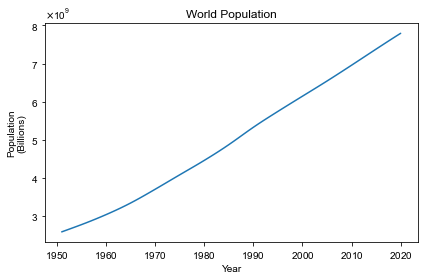

In [17]:
fig, ax = plt.subplots()
plt.style.use('seaborn-darkgrid')
ax.plot(df['Year'], df['World Population'])
ax.set(xlabel='Year', ylabel='Population\n(Billions)', title='World Population')
ax.ticklabel_format(useMathText=True)
fig.tight_layout()

Increasing trend

### World Population Yearly Change

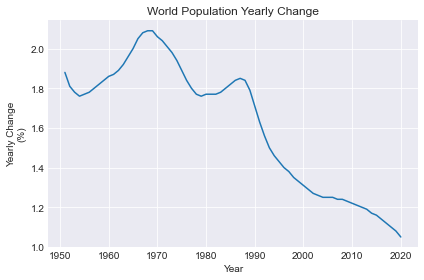

In [18]:
fig, ax = plt.subplots()
plt.style.use('seaborn-darkgrid')
ax.plot(df['Year'], df['Yearly Change'])
ax.set(xlabel='Year', ylabel='Yearly Change\n(%)', title='World Population Yearly Change')
fig.tight_layout()

Yearly change is, overall, decreasing

### Population Density over time

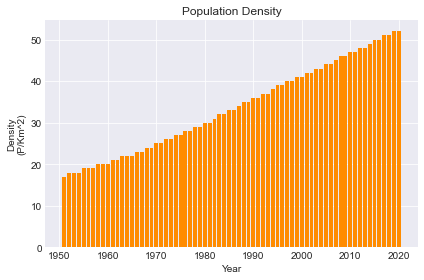

In [19]:
fig, ax = plt.subplots()
plt.style.use('seaborn-darkgrid')
ax.bar(df['Year'], df['Density (P/Km^2)'], color='darkorange')
ax.set(xlabel='Year', ylabel='Density\n(P/Km^2)', title='Population Density')
fig.tight_layout()

Population density is increasing

### Urban vs Rural

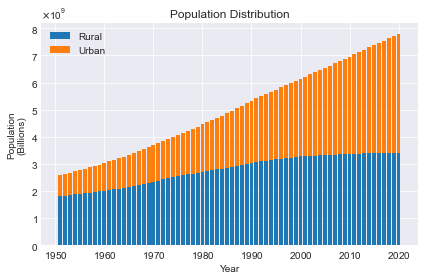

In [20]:
labels = df['Year']
urban = df['Urban Pop']
rural = df['World Population'] - df['Urban Pop']

fig, ax = plt.subplots()
plt.style.use('seaborn-darkgrid')
ax.bar(labels, rural, label='Rural')
ax.bar(labels, urban,  bottom=rural,label='Urban')
ax.legend()

ax.ticklabel_format(useMathText=True)
fig.tight_layout()

ax.set(xlabel='Year', ylabel='Population\n(Billions)', title='Population Distribution')
fig.tight_layout()

People are increasing in Urban areas

## Conclusions:
The world population is increasing nearly at a steady rate, however, the yearly change is decreasing over time. Density-wise, more people are living in a unit space nowadays compared to the past 7 decades, where most of them are in urban areas.